In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from fa2_modified import ForceAtlas2
import pickle

# Load the graph from the pickle file
with open('artist_graph.pkl', 'rb') as f:
    G = pickle.load(f)

# Set node attributes 'length_of_content' and calculate node degree
# For simplicity, we'll use random values for 'length_of_content'
for node in G.nodes():
    G.nodes[node]['len_content'] = np.random.randint(1, 100)

# Initialize ForceAtlas2 layout algorithm
forceatlas2 = ForceAtlas2(
    # Adjust these parameters to tweak the layout
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,
    gravity=1.0,
    scalingRatio=2.0,
    strongGravityMode=False,
    verbose=True
)

# Use ForceAtlas2 to get node positions
positions = forceatlas2.forceatlas2_networkx_layout(G, iterations=1000)

100%|██████████| 1000/1000 [00:33<00:00, 29.80it/s]

BarnesHut Approximation  took  4.18  seconds
Repulsion forces  took  28.06  seconds
Gravitational forces  took  0.12  seconds
Attraction forces  took  0.10  seconds
AdjustSpeedAndApplyForces step  took  0.61  seconds


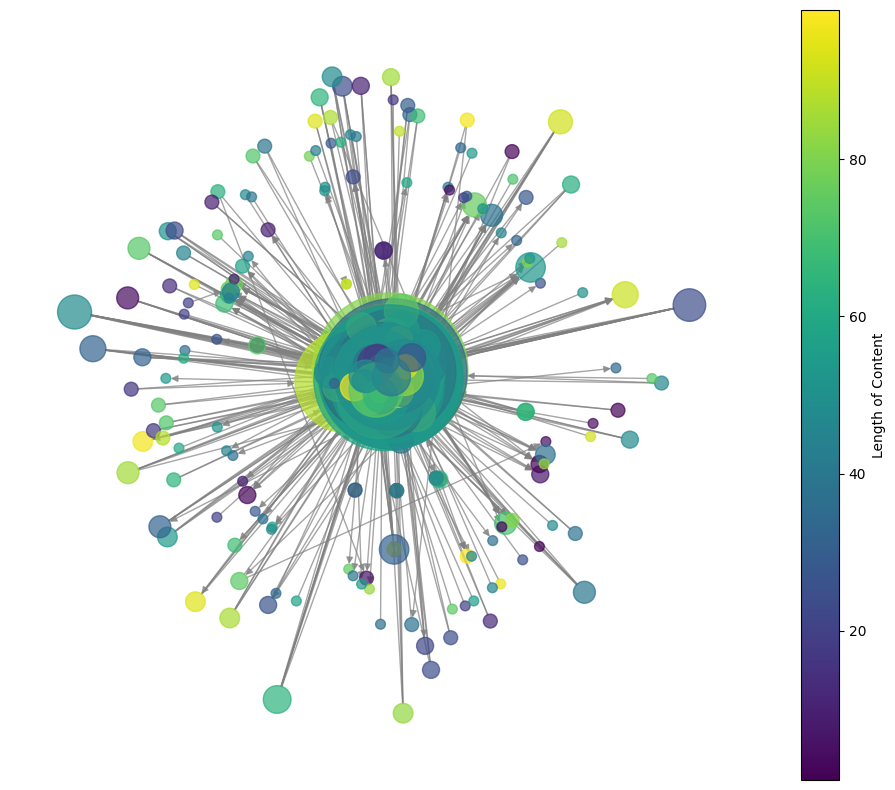

In [7]:
# Prepare node colors and sizes
# plot the network
degrees = dict(G.degree())

# Normalize node sizes based on degree (you can tweak scaling factor if necessary)
node_sizes = [degrees[node] * 50 for node in G.nodes()]

# Get 'length_of_content' attribute for each node, if it exists
content_lengths = [G.nodes[node].get('len_content', 0) for node in G.nodes()]

# Normalize content lengths for color mapping
norm = plt.Normalize(vmin=min(content_lengths), vmax=max(content_lengths))

# Draw the network with the computed ForceAtlas2 positions
fig, ax = plt.subplots(figsize=(12, 10))
cmap = plt.cm.viridis

# Create the scalar mappable (for the color bar)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(content_lengths)

nx.draw(
    G,
    ax=ax,
    pos=positions,
    node_color=content_lengths,
    node_size=node_sizes,
    cmap=cmap,  # Colormap for node colors
    with_labels=False,
    font_size=8,
    edge_color='gray',
    alpha=0.7
)

# Add the color bar to the specific axis
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Length of Content', color='black')  # Color of the color bar label

ax.tick_params(colors='black')  # Color of the axis ticks

plt.show()

In [8]:
in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Performers by In-Degree:")
for performer, in_deg in in_degrees:
    print(f"{performer}: {in_deg}")

print("\nTop 5 Performers by Out-Degree:")
for performer, out_deg in out_degrees:
    print(f"{performer}: {out_deg}")

Top 5 Performers by In-Degree:
Willie_Nelson: 202
Johnny_Cash: 184
Elvis_Presley: 177
Dolly_Parton: 162
George_Jones: 156

Top 5 Performers by Out-Degree:
Hillary_Lindsey: 100
Pam_Tillis: 82
Randy_Travis: 75
Vince_Gill: 71
Patty_Loveless: 68
